# Portafolios de Inversión
## Primer Examen Parcial
José Armando Melchor Soto

---





### Librerías

In [248]:
import pandas as pd
import numpy as np

---

---

In [249]:
prices = pd.read_excel('datos.xlsx')
prices

,Date,DJI,J&J,CAT,AAPL
0,2022-05-19,100.000000,100.000000,100.000000,100.000000
1,2022-05-20,100.028047,101.747729,95.676146,100.174736
2,2022-05-23,102.006554,103.162010,98.737667,104.193666
3,2022-05-24,102.161343,104.288835,99.463146,102.191482
4,2022-05-25,102.774591,103.265494,101.233314,102.307972
...,...,...,...,...,...
747,2025-05-13,134.835888,85.339772,170.506868,155.027303
748,2025-05-14,134.549915,84.143958,169.113949,154.590462
749,2025-05-15,135.419243,86.012418,169.186496,153.949763
750,2025-05-16,136.481514,87.001265,171.009867,153.811431


#### Ponderaciones 

In [250]:
w= np.array([0.3,0.3,0.4])
w

array([0.3, 0.3, 0.4])

#### Returns Generales

In [251]:
ret_gen = prices.drop(columns=['Date','DJI']).pct_change().dropna()
ret_gen

,J&J,CAT,AAPL
1,0.017477,-0.043239,0.001747
2,0.013900,0.031999,0.040119
3,0.010923,0.007348,-0.019216
4,-0.009813,0.017797,0.001140
5,-0.000891,0.017582,0.023200
...,...,...,...
747,-0.036979,0.029164,0.010152
748,-0.014012,-0.008169,-0.002818
749,0.022206,0.000429,-0.004144
750,0.011497,0.010777,-0.000899


In [252]:
mean = ret_gen.mean()
ret_anual = (w*mean).sum()
ret_anual*252*100

13.137946246036474

#### Covarianza 

In [253]:
cov = ret_gen.cov()
cov

,J&J,CAT,AAPL
J&J,0.000118,0.000020,0.000028
CAT,0.000020,0.000363,0.000140
AAPL,0.000028,0.000140,0.000331


#### Var 

In [277]:
var = w.T @ cov @ w
var*100*252


3.5338202147880144

### Vol anuaL

In [255]:
vol_anual = np.sqrt(var) * np.sqrt(252)
vol_anual*100

18.798457954811116

---

#### Return J&J

In [256]:
ret_JJ = prices['J&J'].pct_change().dropna()
ret_JJ

1      0.017477
2      0.013900
3      0.010923
4     -0.009813
5     -0.000891
         ...   
747   -0.036979
748   -0.014012
749    0.022206
750    0.011497
751    0.007665
Name: J&J, Length: 751, dtype: float64

### 9 Rendimiento esperado para J&J

In [257]:
mean_JJ = ret_JJ.mean()
ret_JJ_anual = (mean_JJ*w).sum()
ret_JJ_anual*252*100

-2.9290547858893823

#### Varianza individual de J&J

In [258]:
var_JJ = ret_JJ.var()
var_JJ

0.00011788533181152898

#### 10 Volatilidad individual del portafolio diaria para J&J

In [259]:
vol_JJ = np.sqrt(var_JJ)
vol_JJ*100

1.085750117713689

--

#### 11 Varianza anual del portafolio 

In [260]:
var = w.T @ cov @ w
var*252*100

3.5338202147880144

### Matriz de corr 

In [261]:
corr = ret_gen.corr()
corr

,J&J,CAT,AAPL
J&J,1.000000,0.097364,0.143737
CAT,0.097364,1.000000,0.403509
AAPL,0.143737,0.403509,1.000000


#### 12 Ratio Sharpe

##### Tasa libre de riesgo del 3%

In [262]:
rf = 0.03

In [263]:
RS = (ret_anual - rf) / vol_anual
RS

-0.1568142078334679

#### 13 Matriz de Correlación

In [264]:
ret_gen.corr()

,J&J,CAT,AAPL
J&J,1.000000,0.097364,0.143737
CAT,0.097364,1.000000,0.403509
AAPL,0.143737,0.403509,1.000000


---

#### 14 Ratio Sharpe estrategia Pasiva 

- ret anual
- rf 
- vol anual  

In [265]:
rf = 0.03

In [266]:
ret = prices['DJI'].pct_change().dropna()
ret

1      0.000280
2      0.019780
3      0.001517
4      0.006003
5      0.016093
         ...   
747   -0.006358
748   -0.002121
749    0.006461
750    0.007844
751    0.003219
Name: DJI, Length: 751, dtype: float64

In [267]:
ret_anual = ret.mean() *252
ret_anual*100

11.724915421236627

### var anual

In [268]:
var = ret.var() *252
var*100

2.3657904468559994

vol anual

In [269]:
vol = np.sqrt(var)
vol*100

15.381126248932485

RS

In [270]:
RS= (ret_anual - rf) / vol
RS 

0.5672481507550315

----

#### Rendimiento Esperado

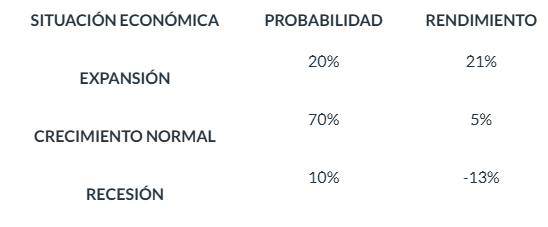

In [273]:
df = pd.DataFrame(index=['Exp', 'Crec', 'Rece'])
df['proba']= [0.2,0.7,0.1]
df['Rend']= [0.21,0.05,-0.13]
df


,proba,Rend
Exp,0.2,0.21
Crec,0.7,0.05
Rece,0.1,-0.13


In [274]:
df['E']= df['proba']* df['Rend']
df['E'].sum()

0.064

#### Volatilidad esperada


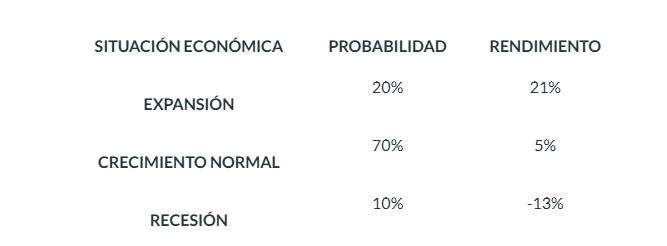

In [ ]:
V[E] = 